In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]


In [5]:
print(X)

[[ 0.5881308   0.89771373]
 [ 0.89153073  0.81583748]
 [ 0.03588959  0.69175758]
 [ 0.37868094  0.51851095]
 [ 0.65795147  0.19385022]
 [ 0.2723164   0.71860593]
 [ 0.78300361  0.85032764]
 [ 0.77524489  0.03666431]
 [ 0.11669374  0.7512807 ]
 [ 0.23921822  0.25480601]
 [ 0.85762553  0.94977903]
 [ 0.56168686  0.17878052]
 [ 0.77025193  0.49238104]
 [ 0.63125307  0.83949792]
 [ 0.4610394   0.49794007]
 [ 0.67941112  0.65078591]
 [ 0.26879524  0.06732467]
 [ 0.77144514  0.48098413]
 [ 0.32920641  0.51064106]
 [ 0.26362883  0.31051155]
 [ 0.62685344  0.55744981]
 [ 0.31857956  0.39484322]
 [ 0.25797459  0.58224112]
 [ 0.16162871  0.59813382]
 [ 0.82582358  0.15639172]
 [ 0.73430052  0.40864343]
 [ 0.7786879   0.80397057]
 [ 0.78607144  0.59228702]
 [ 0.6644892   0.64656729]
 [ 0.42563648  0.51356833]
 [ 0.50125784  0.03708381]
 [ 0.7081161   0.6204306 ]
 [ 0.77780853  0.45940947]
 [ 0.37980555  0.2918922 ]
 [ 0.55722886  0.0841636 ]
 [ 0.63128167  0.94457049]
 [ 0.89123753  0.87858258]
 

Solution
===

In [6]:
def compute_log_p(X, mean, sigma):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

In [7]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [8]:
print(log_ps)

[array([  1.04426134e+00,   4.72734251e-01,  -1.09175411e+01,
        -1.77142634e+00,  -9.35806711e-01,  -3.60176551e+00,
         1.28061352e+00,  -2.62760104e+00,  -8.03935487e+00,
        -6.36531288e+00,   5.34637309e-01,  -1.55472052e+00,
         8.84354599e-01,   1.36874142e+00,  -5.48823372e-01,
         1.46748317e+00,  -7.36114714e+00,   8.31979343e-01,
        -2.76732434e+00,  -5.33576755e+00,   1.11503962e+00,
        -3.53742991e+00,  -4.17139257e+00,  -6.80017057e+00,
        -1.68598922e+00,   5.96835706e-01,   1.35563404e+00,
         1.14211261e+00,   1.43800790e+00,  -1.00068955e+00,
        -3.56171609e+00,   1.42011317e+00,   7.09102377e-01,
        -2.98585392e+00,  -2.51263285e+00,   1.13714126e+00,
         3.81785428e-01,  -2.01024310e+00,   6.58834328e-01,
        -3.85385939e+00,  -1.04576270e+01,  -5.66308795e+00,
        -4.94925000e+00,  -1.48244258e+00,  -1.15087926e+01,
         1.40713991e+00,  -1.40257318e+01,   7.03600678e-02,
        -1.13543592e-01

In [9]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


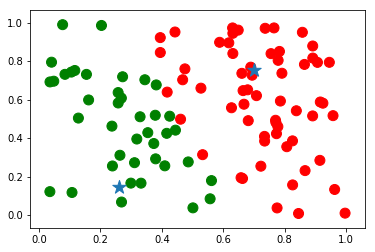

In [10]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()